<a href="https://colab.research.google.com/github/Ditsuhi/ExploratoryAnalysis_FeatureSelection/blob/main/Mutual_Information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# import required libraries

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from matplotlib import pyplot
import pandas as pd
import numpy as np
import pickle


In [20]:
# the dataset can be found at the following link: https://doi.org/10.5281/zenodo.6497108. 
# the path provided below can be changed depending your data location.

data = pd.read_csv('/content/Madrid_wind_2019.csv', index_col='Unnamed: 0')


In [21]:
data.columns

Index(['NO2', 'intensidad', 'ocupacion', 'windSpeed', ' Pressure', ' SolarRad',
       ' Temperature', ' Humidity', 'carga', 'vmed', 'v_comp', 'u_comp',
       'windDir_Categ_east', 'windDir_Categ_north', 'windDir_Categ_northeast',
       'windDir_Categ_northwest', 'windDir_Categ_south',
       'windDir_Categ_southeast', 'windDir_Categ_southwest',
       'windDir_Categ_west'],
      dtype='object')

In [22]:
# below are the features selected to run mutual information. There are 2 scenarios to be run. The first scenario includes wind direction converted to categories and then applied One Hot Encoder. 

# first option
# data = data[['NO2', 'intensidad', 'ocupacion', 'windSpeed', ' Pressure', ' SolarRad',
#        ' Temperature', ' Humidity', 'carga', 'vmed', 'windDir_Categ_east', 'windDir_Categ_north', 'windDir_Categ_northeast',
#        'windDir_Categ_northwest', 'windDir_Categ_south',  'windDir_Categ_southeast', 'windDir_Categ_southwest',
#        'windDir_Categ_west'
#        ]]


# second scenario
## This part that is currently uncommented includes wind direction converted to u and v components.

data = data[['NO2', 'intensidad', 'ocupacion', 'windSpeed', ' Pressure', ' SolarRad',
       ' Temperature', ' Humidity', 'carga', 'vmed', 'v_comp', 'u_comp'
       ]]       

In [23]:
#create dependent and independent variables from our dataset (target variable-nitrogen dioxide, independent variable-the rest of the features)

X = data.drop(['NO2'], axis=1)
y = data['NO2']

#after determining X and y, to implement mutual information, it is necessary to create training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = False)

# calculate mutual information feature selection for numerical input data
# feature selection
def select_features(x_train, y_train, x_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(x_train, y_train)
	# transform train input data
	x_train_fs = fs.transform(x_train)
	# transform test input data
	x_test_fs = fs.transform(x_test)
	return x_train_fs, x_test_fs, fs


x_train_fs, x_test_fs, fs = select_features(x_train, y_train, x_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))


Feature 0: 0.024618
Feature 1: 0.020824
Feature 2: 0.014934
Feature 3: 0.008034
Feature 4: 0.004777
Feature 5: 0.002641
Feature 6: 0.002006
Feature 7: 0.021411
Feature 8: 0.020642
Feature 9: 0.022457
Feature 10: 0.022915


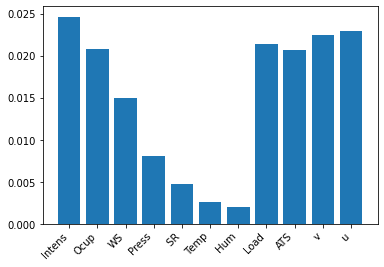

In [25]:
## plot the scores
##creating list with X.columns
# bars  = ['Intens', 'Ocup', 'WS', ' Press', ' SR', ' Temp', ' Hum', 'Load', 'ATS',  'E', 'N', 'NE',  'NW', 'S',  'SE', 'SW',  'W']
bars  = ['Intens', 'Ocup', 'WS', ' Press', ' SR', ' Temp', ' Hum', 'Load', 'ATS',  'v', 'u']
y_pos = np.arange(len(bars))
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.xticks(y_pos, bars,  rotation=45,  horizontalalignment='right')
pyplot.savefig('mutInfo.pdf')
pyplot.show()

In [26]:
# with open('mutInf_WDCat.pkl', 'wb') as f:
#   pickle.dump(fs, f)

with open('mutInf_WDUV.pkl', 'wb') as f:
  pickle.dump(fs, f)

In [4]:
with open('/content/mutInf_WDUV.pkl', 'rb') as f:
  fs = pickle.load(f)